# Nuclear Radiation
Devin Cunningham <br>
Partners: Max Casebolt, Alex Colbaugh

### Abstract:
We conducted four separate experiments using samples of Cesium 137. First, we measured a decay rate by determining the efficiency of our Geiger counter. Second, we used Poisson distribution statistics to show how we may measure count number. Third, we use the radiation data to determine the thickness of a random shielding. Finally, we measured the half-life of Barium 137. 

### Introduction and theoretical overview:
In 1911, Ernest Rutherford proposed the existence of protons and neutrons in an atom. Further experiments demonstrated that having a sufficient surplus of either neutrons or protons can cause an atom to become unstable. When instability is reached, radioactive nuclides begin spontaneously emitting particles and transforming into different kinds of nuclides.

The types of particles that can be emitted are alpha, beta, and gamma. In alpha radiation, the nucleus becomes a different nuclide after releasing its alpha particle. This has the highest potential for ionization, but the lowest penetrating power. In beta radiation, electrons or positrons are spontaneously emitted. This has both moderate ionization potential as well as penetrating power. In gamma radiation, the nucleus decays into its ground state and releases gamma-ray photons. This has the lowest potential for ionization, but the highest penetrating power. Incredibly, lead walls are needed to protect against these destructive gamma-ray particles.



### Experimental Data and Error Analysis:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
from numpy import linspace,exp
from scipy.interpolate import UnivariateSpline, interp1d
from scipy.stats import linregress
% matplotlib inline

def beautification():
    ax.set_facecolor('whitesmoke')
    ax.patch.set_alpha(.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.minorticks_on()
    ax.tick_params('both', length=8, which='major', labelsize='10')
    ax.tick_params('both',length=3, which='minor')
    ax.grid(True, which='major', ls='dashed', alpha=.5)
    ax.grid(True, which='minor', ls='dashed', alpha=.15)
    ax.legend(loc='best')

def minimalization():
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

colors = [np.array([141,211,199])/255., np.array([190,186,218])/255., np.array([251,128,114])/255.,
          np.array([128,177,211])/255., np.array([253,180,98])/255.,
          np.array([179,222,105])/255., np.array([252,205,229])/255.,
          np.array([217,217,217])/255., np.array([188,128,189])/255.]

### Experiment 1: Efficiency Determination

498.873333333


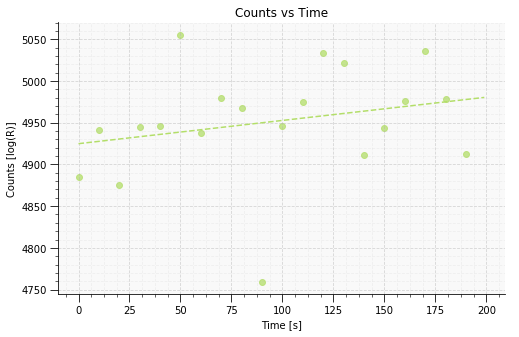

In [77]:
# background taken in 10s intervals
efficiency_background = [17,25,25,15,23,21,24,24,15,19]
efficiency_background = np.average(efficiency_background)
# 20 counts taken in 10s intervals for Cs-137
efficiency_short = np.array([4906,4962,4896,4966,4967,5076,4959,5000,
                             4988,4780,4967,4996,5054,5042,4932,4965,
                             4997,5057,4999,4933]) - efficiency_background

efficiency_time = np.arange(0,len(efficiency_short)*10,10)
efficiency_lr = linregress(efficiency_time, efficiency_short)

# 1 count taken in 30s interval
efficiency_long = 14987 - efficiency_background
print efficiency_long/30.

fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)
fig.suptitle('', fontsize=20)

ax = fig.add_subplot(gs[0, 0])
plt.scatter(efficiency_time, efficiency_short, color=colors[5], alpha=.75)
ax.plot(range(200), efficiency_lr[0]*np.arange(200)+efficiency_lr[1], '--', c = colors[5])
ax.update({'title': 'Counts vs Time',
            'xlabel': 'Time [s]',
            'ylabel': 'Counts [log(R)]'})
beautification()

### Experiment 2: Statistics

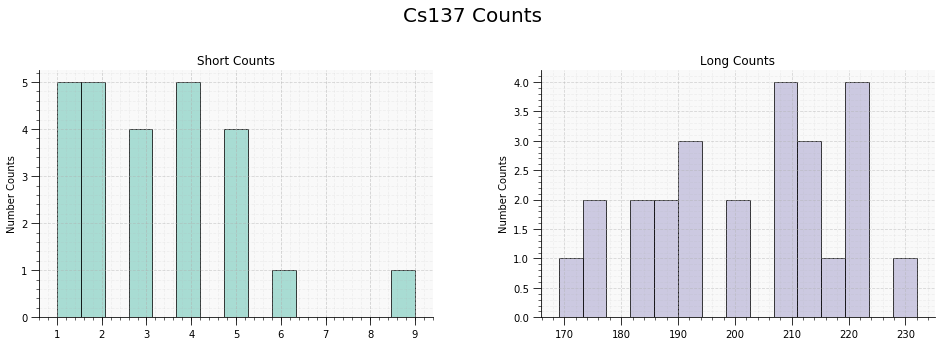

In [8]:
# 25 counts taken in 1s intervals
statistics_short = [2,5,5,1,4,4,5,4,4,1,2,2,1,2,5,3,2,9,3,
                    1,3,6,3,1,4]
# 25 counts taken in 50s intervals
statistics_long = [220,169,214,199,175,191,232,223,176,208,
                   223,188,194,218,186,208,192,182,209,212,
                   220,183,211,200,209]

height_ratios = [.05,5]
width_ratios = [8,.05,8]
wspace = 0
hspace = 0
fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)
fig.suptitle('Cs137 Counts', fontsize=20)

ax = fig.add_subplot(gs[1, 0])
plt.hist(statistics_short, bins=15, color=colors[0], alpha=.75, edgecolor='k')
ax.update({'title': 'Short Counts',
            'xlabel': '',
            'ylabel': 'Number Counts'})
ax.minorticks_on()
beautification()

ax = fig.add_subplot(gs[1,2])
plt.hist(statistics_long, bins = 15, color=colors[1], alpha=.75, edgecolor='k')
ax.update({'title': 'Long Counts',
            'xlabel': '',
            'ylabel': 'Number Counts'})
beautification()

plt.show()

### Experiment 3: Shielding

16.4288819436


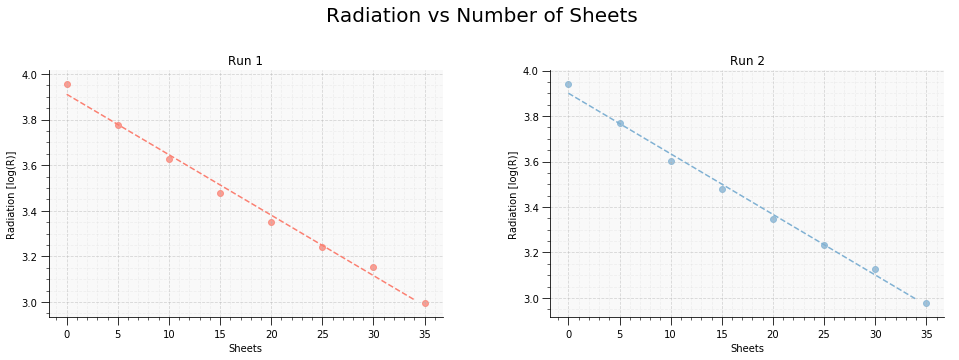

In [86]:
# counts per 60s interval as a function of number of sheets netween sample and detector
sheets = [0,5,10,15,20,25,30,35]
data3 = np.log10([9029,5992,4254,2998,2243,1751,1419,987]) # first run
data35 = np.log10([8718,5865,4008,3006,2236,1703,1342,947]) # second run
# ran unknown thickness(55/SS) twice
unknown = [2991,3107]

data3_lr = linregress(sheets, data3)
data35_lr = linregress(sheets, data35)

height_ratios = [.05,5]
width_ratios = [8,.05,8]
wspace = 0
hspace = 0
fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)
fig.suptitle('Radiation vs Number of Sheets', fontsize=20)

ax = fig.add_subplot(gs[1, 0])
plt.scatter(sheets, data3, color=colors[2], alpha=.75)
ax.plot(range(35), data3_lr[0]*np.arange(35)+data3_lr[1], '--', c = colors[2])
ax.update({'title': 'Run 1',
            'xlabel': 'Sheets',
            'ylabel': 'Radiation [log(R)]'})
beautification()

ax = fig.add_subplot(gs[1, 2])
plt.scatter(sheets, data35, color=colors[3], alpha=.75)
ax.plot(range(35), data35_lr[0]*np.arange(35)+data35_lr[1], '--', c = colors[3])
ax.update({'title': 'Run 2',
            'xlabel': 'Sheets',
            'ylabel': 'Radiation [log(R)]'})
beautification()

unknown_sheets = (np.log10(unknown[0])-data3_lr[1])/data3_lr[0]
print unknown_sheets

### Experiment 4: Half-life

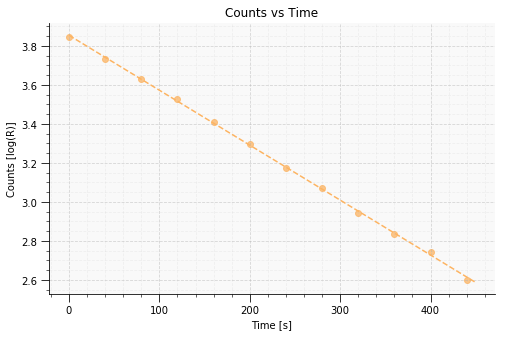

In [74]:
# counts per 20s interval, waiting 40s between each run
half_background = [9,11,13,12,14]
half_data = np.log10(np.array([7016,5433,4287,3363,2589,2001,1503,1184,888,699,565,411]) - np.average(half_background))
half_time = np.arange(0,len(half_data)*40,40)
half_lr = linregress(half_time, half_data)

height_ratios = [5]
width_ratios = [8]
wspace = 0
hspace = 0
fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)
fig.suptitle('', fontsize=20)

ax = fig.add_subplot(gs[0, 0])
plt.scatter(half_time, half_data, color=colors[4], alpha=.75)
ax.plot(range(450), half_lr[0]*np.arange(450)+half_lr[1], '--', c = colors[4])
ax.update({'title': 'Counts vs Time',
            'xlabel': 'Time [s]',
            'ylabel': 'Counts [log(R)]'})
beautification()

### Discussion and Conclusion:
Look what we did!

### References:
Shoutout to the homies